# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 7
## "Modele Liniowe"

In [1]:
# Import Modułów
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import patsy
import numpy as np

In [2]:
def linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)

    # Wstępny wykres
    DF.plot.scatter(x=X_name,y=y_name,marker='o')
    plt.suptitle('Wykres wstepny')
    plt.show()

    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3)
    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    # Tworzenie modelu
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model1.coef_))
    print("Intercept = {a}\n".format(a=model1.intercept_))
    # Coef to współczynniki wielomianu opisującego zmienne zależne i niezależne
    # Intercept to wartości zmiennych niezależnych dla zmiennych zależnych równych 0
    # W interpretacji geometrycznej, coef to nachylenie prostej, a intercept to miejsce przecięcia z osią Y

    # Predykcja czesci testowej
    y_pred = model1.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))

    # Wykresy
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, 'r')
    plt.suptitle('Regresja liniowa')
    plt.show()

    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))
    

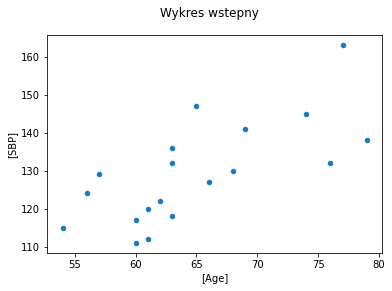


Coef = [[1.278697]]
Intercept = [48.19286453]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[ 13.37383661  -4.5770424   -4.20010341 -15.6918304    6.19338159
    2.24250259   5.47207859  -3.24922441  -7.24922441   5.5868666
   -2.18355739  13.91468459  14.19338159  10.75077559]]



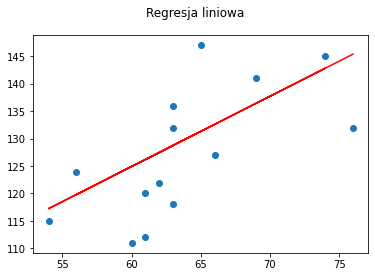


Średni błąd bezwzględny = 7.777035012557245
Błąd średniokwadratowy = 81.91093496753481
Pierwiastek błędu średniokwadratowego = 9.050466008307794


In [80]:
#linear_reg('SCORES.csv', ['Hours'], ['Scores'])
linear_reg('SBP.csv', ['Age'], ['SBP'])

In [78]:
def multiple_linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)
    
    # Wstępny wykres
    f,ax = plt.subplots(1)
    for ea, col in zip(X_name, ['r', 'g', 'b', 'm']):
        DF.plot.scatter(x=ea,y=y_name, ax=ax, color=col, label='{}'.format(ea), figsize=(10, 7), xlabel='')
    plt.suptitle('Wykres wstepny')
    plt.show()
    
    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    # Tworzenie modelu
    model2 = LinearRegression()
    model2.fit(X_train, y_train)
    
    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model2.coef_))
    print("Intercept = {a}\n".format(a=model2.intercept_))
    
    # Predykcja czesci testowej
    y_pred = model2.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))
    
    # Wykresy
    f,ax = plt.subplots(1)
    f.set_size_inches(10, 7)
    for i in range(4):
        col = ['r', 'g', 'b', 'm']
        column = X_test[:,i].reshape(-1, 1)
        plt.scatter(x=column,y=y_test, color=col[i])
        plt.plot(column, y_pred, color=col[i])
    plt.legend(['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'])
    plt.suptitle('Regresja liniowa')
    plt.show()
    
    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))

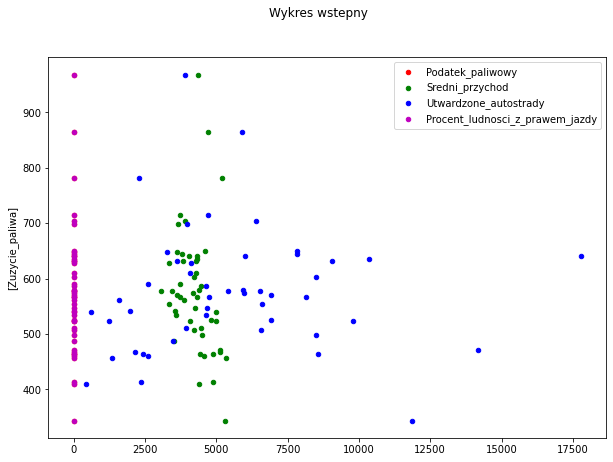


Coef = [[-5.04225721e+01 -4.80441362e-02 -1.63177589e-03  8.41640223e+02]]
Intercept = [694.74511042]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[ -44.73097603   77.71584884    4.2485272    52.90914817   17.34452376
     4.77486925  -32.98692093   57.15178281 -275.75452098  109.99224931
    52.03159752  -19.05569199  -19.75072414   60.33571509 -104.06541329
   -32.24823861  127.16736444   17.64568819   45.86951046   55.64584638
    79.62226096  -22.42288975   48.65750396  -53.72239634   18.01432185
    60.5813757   -66.65861138   43.06881465  -83.14847693 -150.09347344
    44.94419613   -9.9594853   -58.7241009   -78.51461056]]



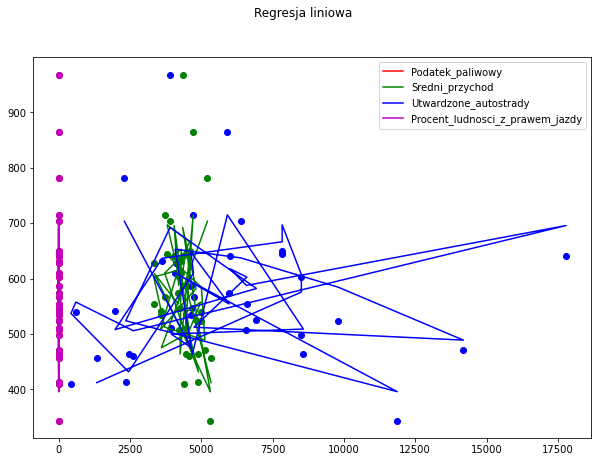


Średni błąd bezwzględny = 59.692872801494104
Błąd średniokwadratowy = 6114.465614550323
Pierwiastek błędu średniokwadratowego = 78.19504852962446


In [79]:
multiple_linear_reg('PETROL.csv', ['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'], ['Zuzycie_paliwa'])